In [1]:
#learn gung fu
import numpy as np
import pandas as pd
pd.options.display.max_columns = 61
pd.options.display.max_rows = 61

import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
import explore
import wrangle
import scale 

# Wrangle

In [2]:
#load data
df = pd.read_csv('employee_attrition.xls', index_col = 0)

#preview data
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
#get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

In [4]:
#get rid of camel-case (lower case all of the columns) 
df.columns = df.columns.str.lower()

In [5]:
#rename columns
df = df.rename(columns = {'businesstravel': 'business_travel',
                          'dailyrate': 'daily_rate',
                          'distancefromhome': 'distance_from_home',
                          'educationfield': 'education_field',
                          'employeecount': 'employee_count',
                          'employeenumber': 'employee_id',
                          'environmentsatisfaction': 'environment_satisfaction',
                          'hourlyrate': 'hourly_rate',
                          'jobinvolvement': 'job_involvement',
                          'joblevel': 'job_level',
                          'jobrole': 'job_role',
                          'jobsatisfaction': 'job_satisfaction',
                          'maritalstatus': 'marital_status',
                          'monthlyincome': 'monthly_income',
                          'monthlyrate': 'monthly_rate',
                          'numcompaniesworked': 'companies_worked',
                          'percentsalaryhike': 'percent_salary_hike',
                          'performancerating': 'performance_rating',
                          'relationshipsatisfaction': 'relationship_satisfaction',
                          'standardhours': 'standard_hours',
                          'stockoptionlevel': 'stock_option_level',
                          'totalworkingyears': 'total_working_years',
                          'trainingtimeslastyear': 'hours_trained_last_year',
                          'worklifebalance': 'work_life_balance',
                          'yearsatcompany': 'company_years',
                          'yearsincurrentrole': 'current_role_years',
                          'yearssincelastpromotion': 'years_since_last_promotion',
                          'yearswithcurrmanager': 'years_with_manager'
                         }
              )

In [6]:
#gather all the columns with numeric data types in a list
#numeric = df.columns[df.dtypes == 'int64'].to_list()

I want to explore differences in model performance from discrete features. I will make a list of out of the discrete variables. For items in this list, the item can be measured on a scale from 1 to 4 (except the education, that is on a scale of 1 to 5), or the item can be viewed as a category.

In [7]:
#check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   attrition                   1470 non-null   object
 1   business_travel             1470 non-null   object
 2   daily_rate                  1470 non-null   int64 
 3   department                  1470 non-null   object
 4   distance_from_home          1470 non-null   int64 
 5   education                   1470 non-null   int64 
 6   education_field             1470 non-null   object
 7   employee_count              1470 non-null   int64 
 8   employee_id                 1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   int64 
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   int64 
 13  job_level                   1470 non-null   int64

I want to get a feel for the data I am about to explore, and I would like to separate the data into numeric, categorical and discrete features. I will now loop through all of the columns to get a better feel as to what's available and what goes where.

In [8]:
#loop through columns to print number of unique values that each feature has
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    print('---')

attrition: 2
---
business_travel: 3
---
daily_rate: 886
---
department: 3
---
distance_from_home: 29
---
education: 5
---
education_field: 6
---
employee_count: 1
---
employee_id: 1470
---
environment_satisfaction: 4
---
gender: 2
---
hourly_rate: 71
---
job_involvement: 4
---
job_level: 5
---
job_role: 9
---
job_satisfaction: 4
---
marital_status: 3
---
monthly_income: 1349
---
monthly_rate: 1427
---
companies_worked: 10
---
over18: 1
---
overtime: 2
---
percent_salary_hike: 15
---
performance_rating: 2
---
relationship_satisfaction: 4
---
standard_hours: 1
---
stock_option_level: 4
---
total_working_years: 40
---
hours_trained_last_year: 7
---
work_life_balance: 4
---
company_years: 37
---
current_role_years: 19
---
years_since_last_promotion: 16
---
years_with_manager: 18
---


Which features will I leave behind? Which ones will I dummy?

In [9]:
#loop through columns, and print out values and counts for each feature
for col in df.columns:
    print(col)
    print('---')
    print(df[col].value_counts().sort_index(ascending = False))
    print('==============')
    print('              ')

attrition
---
Yes     237
No     1233
Name: attrition, dtype: int64
              
business_travel
---
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: business_travel, dtype: int64
              
daily_rate
---
1499    1
1498    1
1496    2
1495    3
1492    1
       ..
106     1
105     1
104     1
103     1
102     1
Name: daily_rate, Length: 886, dtype: int64
              
department
---
Sales                     446
Research & Development    961
Human Resources            63
Name: department, dtype: int64
              
distance_from_home
---
29     27
28     23
27     12
26     25
25     25
24     28
23     27
22     19
21     18
20     25
19     22
18     26
17     20
16     32
15     26
14     21
13     19
12     20
11     29
10     86
9      85
8      80
7      84
6      59
5      65
4      64
3      84
2     211
1     208
Name: distance_from_home, dtype: int64
              
education
---
5     48
4    398
3    572
2    282
1    170
Name: e

In [10]:
#set a list of categorical columns based on the columns above
categorical = ['attrition',
               'business_travel',
               'department',
               'education_field',
               'gender',
               'job_role',
               'marital_status',
               'overtime'
              ]

#set a list of discrete columns
discrete = ['education',
            'environment_satisfaction',
            'job_involvement',
            'job_level',
            'job_satisfaction',
            'performance_rating',
            'relationship_satisfaction', 
            'stock_option_level',
            'work_life_balance'
           ]

#set a list of numeric columns
numeric = ['daily_rate',
           'distance_from_home',
           'education',
           'environment_satisfaction',
           'hourly_rate',
           'job_involvement',
           'job_level',
           'job_role',
           'job_satisfaction',
           'monthly_income',
           'monthly_rate',
           'companies_worked',
           'percent_salary_hike',
           'performance_rating',
           'relationship_satisfaction',
           'stock_option_level',
           'total_working_years',
           'hours_trained_last_year',
           'work_life_balance',
           'company_years',
           'current_role_years',
           'years_since_last_promotion',
           'years_with_manager'
          ]

#set a list of columns to drop
superfluous = ['employee_count', 'over18', 'standard_hours']

#drop these columns
df = df.drop(columns = superfluous)

In [11]:
for cat in categorical:
    print(cat)
    print('---')
    print(df[cat].value_counts())
    print('==============')
    print('              ')

attrition
---
No     1233
Yes     237
Name: attrition, dtype: int64
              
business_travel
---
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: business_travel, dtype: int64
              
department
---
Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64
              
education_field
---
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: education_field, dtype: int64
              
gender
---
Male      882
Female    588
Name: gender, dtype: int64
              
job_role
---
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: job_r

In [12]:
#map simple categorical columns to 1 and 0
df.attrition = df.attrition.map({'No': 0, 'Yes': 1})
df.overtime = df.overtime.map({'No': 0, 'Yes': 1})

#remove attrition and overtime since we just one-hot encoded them already
categorical.remove('attrition')
categorical.remove('overtime')

In [13]:
#assign dataframe to dummied variables
dummies = pd.get_dummies(df[categorical], drop_first = False)

#preview
dummies.head()

,business_travel_Non-Travel,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_field_Human Resources,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Female,gender_Male,job_role_Healthcare Representative,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Divorced,marital_status_Married,marital_status_Single
Age,,,,,,,,,,,,,,,,,,,,,,,,,,
41,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
49,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
37,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
33,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
27,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [14]:
#look at columns
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   business_travel_Non-Travel          1470 non-null   uint8
 1   business_travel_Travel_Frequently   1470 non-null   uint8
 2   business_travel_Travel_Rarely       1470 non-null   uint8
 3   department_Human Resources          1470 non-null   uint8
 4   department_Research & Development   1470 non-null   uint8
 5   department_Sales                    1470 non-null   uint8
 6   education_field_Human Resources     1470 non-null   uint8
 7   education_field_Life Sciences       1470 non-null   uint8
 8   education_field_Marketing           1470 non-null   uint8
 9   education_field_Medical             1470 non-null   uint8
 10  education_field_Other               1470 non-null   uint8
 11  education_field_Technical Degree    1470 non-null   uint8
 12  gender_

In [15]:
#lowercase all dummies. replace superfluous string with nothing. clean up columns
dummies.columns = dummies.columns.str.lower().\
str.replace(' ', '_').\
str.replace('business_travel_', '').\
str.replace('department_human_resources', 'hr_dept').\
str.replace('department_', '').\
str.replace('education_field_human_resources', 'hr_ed').\
str.replace('education_field_', '').\
str.replace('gender_', '').\
str.replace('job_role_human_resources', 'hr_job').\
str.replace('job_role_', '').\
str.replace('marital_status_', '').\
str.replace('&', '').\
str.replace('__', '_').\
str.replace('non-travel', 'travel_none').\
str.replace('development', 'dev_dept').\
str.replace('sales', 'sales_dept').\
str.replace('human_resources', 'hr_ed', 1).\
str.replace('life_sciences', 'life_sciences_ed').\
str.replace('marketing', 'marketing_ed').\
str.replace('medical', 'medical_ed').\
str.replace('other', 'other_ed').\
str.replace('technical_degree', 'tech_deg_ed').\
str.replace('gender_', '').\
str.replace('healthcare_representative', 'healthcare_rep_job').\
str.replace('laboratory_technician', 'lab_tech_job').\
str.replace('manager', 'manager_job').\
str.replace('manufacturing_director', 'manufacturing_dir_job').\
str.replace('research_director', 'research_dir_job').\
str.replace('research_scientist', 'research_scientist_job').\
str.replace('sales_dept_executive', 'sales_exec_job').\
str.replace('sales_dept_representative', 'sales_rep_job')

In [16]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   travel_none             1470 non-null   uint8
 1   travel_frequently       1470 non-null   uint8
 2   travel_rarely           1470 non-null   uint8
 3   hr_dept                 1470 non-null   uint8
 4   research_dev_dept       1470 non-null   uint8
 5   sales_dept              1470 non-null   uint8
 6   hr_ed                   1470 non-null   uint8
 7   life_sciences_ed        1470 non-null   uint8
 8   marketing_ed            1470 non-null   uint8
 9   medical_ed              1470 non-null   uint8
 10  other_ed                1470 non-null   uint8
 11  tech_deg_ed             1470 non-null   uint8
 12  female                  1470 non-null   uint8
 13  male                    1470 non-null   uint8
 14  healthcare_rep_job      1470 non-null   uint8
 15  hr_job                

In [17]:
dummies = dummies.drop(columns = 'male')

In [18]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   travel_none             1470 non-null   uint8
 1   travel_frequently       1470 non-null   uint8
 2   travel_rarely           1470 non-null   uint8
 3   hr_dept                 1470 non-null   uint8
 4   research_dev_dept       1470 non-null   uint8
 5   sales_dept              1470 non-null   uint8
 6   hr_ed                   1470 non-null   uint8
 7   life_sciences_ed        1470 non-null   uint8
 8   marketing_ed            1470 non-null   uint8
 9   medical_ed              1470 non-null   uint8
 10  other_ed                1470 non-null   uint8
 11  tech_deg_ed             1470 non-null   uint8
 12  female                  1470 non-null   uint8
 13  healthcare_rep_job      1470 non-null   uint8
 14  hr_job                  1470 non-null   uint8
 15  lab_tech_job          

In [19]:
dummies.head()

,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single
Age,,,,,,,,,,,,,,,,,,,,,,,,,
41,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
49,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
37,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
33,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
27,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [20]:
cf = pd.concat([df, dummies], axis = 1)
df.head()

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_id,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [21]:
cf.head()

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_id,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [22]:
#drop redundants
cf = cf.drop(columns = categorical)
cf.head()

,attrition,daily_rate,distance_from_home,education,employee_id,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [23]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   attrition                   1470 non-null   int64
 1   daily_rate                  1470 non-null   int64
 2   distance_from_home          1470 non-null   int64
 3   education                   1470 non-null   int64
 4   employee_id                 1470 non-null   int64
 5   environment_satisfaction    1470 non-null   int64
 6   hourly_rate                 1470 non-null   int64
 7   job_involvement             1470 non-null   int64
 8   job_level                   1470 non-null   int64
 9   job_satisfaction            1470 non-null   int64
 10  monthly_income              1470 non-null   int64
 11  monthly_rate                1470 non-null   int64
 12  companies_worked            1470 non-null   int64
 13  overtime                    1470 non-null   int64
 14  percent_s

In [24]:
cf['age'] = cf.index
cf = cf.set_index('employee_id')

In [25]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   attrition                   1470 non-null   int64
 1   daily_rate                  1470 non-null   int64
 2   distance_from_home          1470 non-null   int64
 3   education                   1470 non-null   int64
 4   environment_satisfaction    1470 non-null   int64
 5   hourly_rate                 1470 non-null   int64
 6   job_involvement             1470 non-null   int64
 7   job_level                   1470 non-null   int64
 8   job_satisfaction            1470 non-null   int64
 9   monthly_income              1470 non-null   int64
 10  monthly_rate                1470 non-null   int64
 11  companies_worked            1470 non-null   int64
 12  overtime                    1470 non-null   int64
 13  percent_salary_hike         1470 non-null   int64
 14  performa

In [26]:
cf.head()

,attrition,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single,age
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,41
2,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,49
4,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,37
5,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,33
7,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,27


In [27]:
type(cf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   attrition                   1470 non-null   int64
 1   daily_rate                  1470 non-null   int64
 2   distance_from_home          1470 non-null   int64
 3   education                   1470 non-null   int64
 4   environment_satisfaction    1470 non-null   int64
 5   hourly_rate                 1470 non-null   int64
 6   job_involvement             1470 non-null   int64
 7   job_level                   1470 non-null   int64
 8   job_satisfaction            1470 non-null   int64
 9   monthly_income              1470 non-null   int64
 10  monthly_rate                1470 non-null   int64
 11  companies_worked            1470 non-null   int64
 12  overtime                    1470 non-null   int64
 13  percent_salary_hike         1470 non-null   int64
 14  performa

NoneType

# Explore

In [28]:
#pull in datasets
df, train, validate, test = wrangle.prepare_attrition()

In [29]:
#preview unsplit data
df.head()

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single,age
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,41
2,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,49
4,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,37
5,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,33
7,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,27


In [30]:
#juxtapose subset shapes
train.shape, validate.shape, test.shape

((823, 56), (353, 56), (294, 56))

In [31]:
#preview train set
train.head()

,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single,age
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
791,0,Non-Travel,715,Research & Development,19,4,Medical,4,Male,41,3,1,Research Scientist,4,Married,4258,26589,0,0,18,3,1,1,5,3,3,4,3,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,52
505,0,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,3,Female,97,3,4,Manager,4,Single,16659,23258,2,1,13,3,3,0,30,2,3,5,4,1,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,55
900,0,Travel_Frequently,1231,Sales,21,2,Medical,3,Female,54,3,1,Sales Representative,4,Married,2973,21222,5,0,15,3,2,1,10,3,3,5,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,37
1684,1,Travel_Rarely,1320,Research & Development,8,1,Medical,4,Male,93,2,1,Laboratory Technician,3,Single,3989,20586,1,1,11,3,1,0,5,2,3,5,4,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,23
712,0,Travel_Rarely,817,Sales,2,1,Marketing,2,Male,56,4,2,Sales Executive,2,Married,8120,18597,3,0,12,3,4,0,12,3,3,2,2,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,48


In [32]:
#recap on numeric columns
numeric

['daily_rate',
 'distance_from_home',
 'education',
 'environment_satisfaction',
 'hourly_rate',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'monthly_income',
 'monthly_rate',
 'companies_worked',
 'percent_salary_hike',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'total_working_years',
 'hours_trained_last_year',
 'work_life_balance',
 'company_years',
 'current_role_years',
 'years_since_last_promotion',
 'years_with_manager']

Education
* 1 'Below College'
* 2 'College'
* 3 'Bachelor'
* 4 'Master'
* 5 'Doctor'

EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction 
* 1 'Low'
* 2 'Medium'
* 3 'High'
* 4 'Very High'

PerformanceRating 
* 1 'Low'
* 2 'Good'
* 3 'Excellent'
* 4 'Outstanding'

 
WorkLifeBalance 
* 1 'Bad'
* 2 'Good'
* 3 'Better'
* 4 'Best'

Univariate Distributions


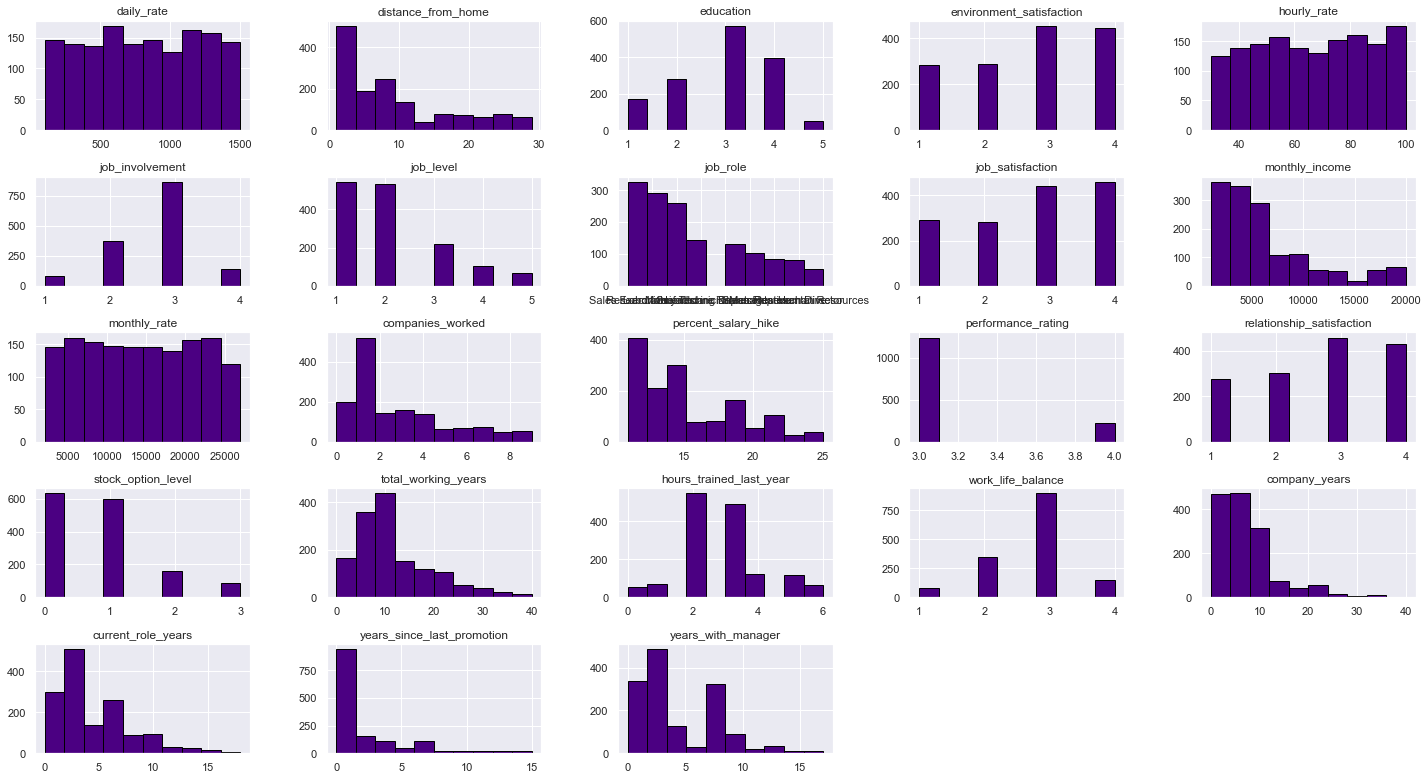

In [33]:
#loop through numeric features to view distributions
explore.distributions_plot(df, numeric)
print('Univariate Distributions')

### Distributions Takeaways
First row:
* daily rate is pretty uniformly distributed
* most people work close to home
* most employees have a bachelor's degree (close to 600) and then more have a master's (approx 400) than those with a 'college' education (around 300) and then a few hundred have 'below college' for education, and then around 50 have a doctorate
* around 300 people have low satsifaction with the environment, around 300 have medium satisfaction-- but around 500 people have high satisfaction and around 500 people have very high satisfaction with the environment
* hourly rate seems normally distributed, with majority of employees (just shy of 200) having an hourly rate of 100

Second row:
* Most employees are highly involved with their job
* Most employees are 1st and 2nd level jobs and around 200 employees have a third level job
* The majority of jobs are held by sales executives, research scientists, laboratory technicians
* Around 300 employees each have low or medium satisfaction, but most people (around 500 each) have high or very high satisfaction
* majority of monthly incomes are 5000 or below


Third row:
* no surprise, monthly rate is also pretty uniformly distributed
* majority of employees have worked at one company, otherwise pretty uniformly distributed from 0-9
* salary hike percentage is skewed to the right, with most employees having relatively low percentage hike in salary
* most employees have performances rated at 'excellent,' but there are around 200 or so with a performance rating of 'outstanding.'
* around 500 or so each have high or very high satisfaction with their relationship, around 300 each have low and medium satisfaction


Fourth row:
* majority of employees own 0 or few stocks from company
* total working years hist is skewed to the right, with majority of employees having 5-10 years of work under their belt (xticks end at 40 for this chart)
* majority of employees trained 2-3 hours last year
* majority of employees rate their work life balance as 'better' (over 800) and around 400 rate it as 'good'
* majority of employees have been with the company for 10 or less years

Fifth row:
* majority of employees have 2-3 years in their current role, chart is heavily skewed to the right
* majority of employees have 0 years since their last promotion, chart is heavily skewed to the right (otherwise uniformly distributed aside from employees with 0-1 years since last promo)
* majority of employees have 2 years with the current manager, and those with 7 years and 0 have similar groupsizes, other than that the chart is pretty randomly distributed 

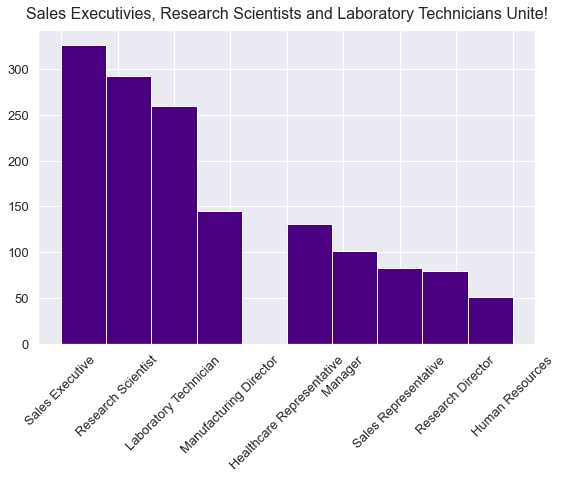

In [34]:
#create larger figure for clarity
plt.figure(figsize = (8, 5))

#induce histogram
df.job_role.hist(color = 'indigo')

#clear it up
plt.tight_layout()

#rotate x ticks (individual x-axis label ticks) 45 degrees, increase size for readability
plt.xticks(rotation = 45, size = 13)

#increase y tick size for readability
plt.yticks(size = 13)

#title
plt.title('Sales Executivies, Research Scientists and Laboratory Technicians Unite!', size = 16, pad = 11);

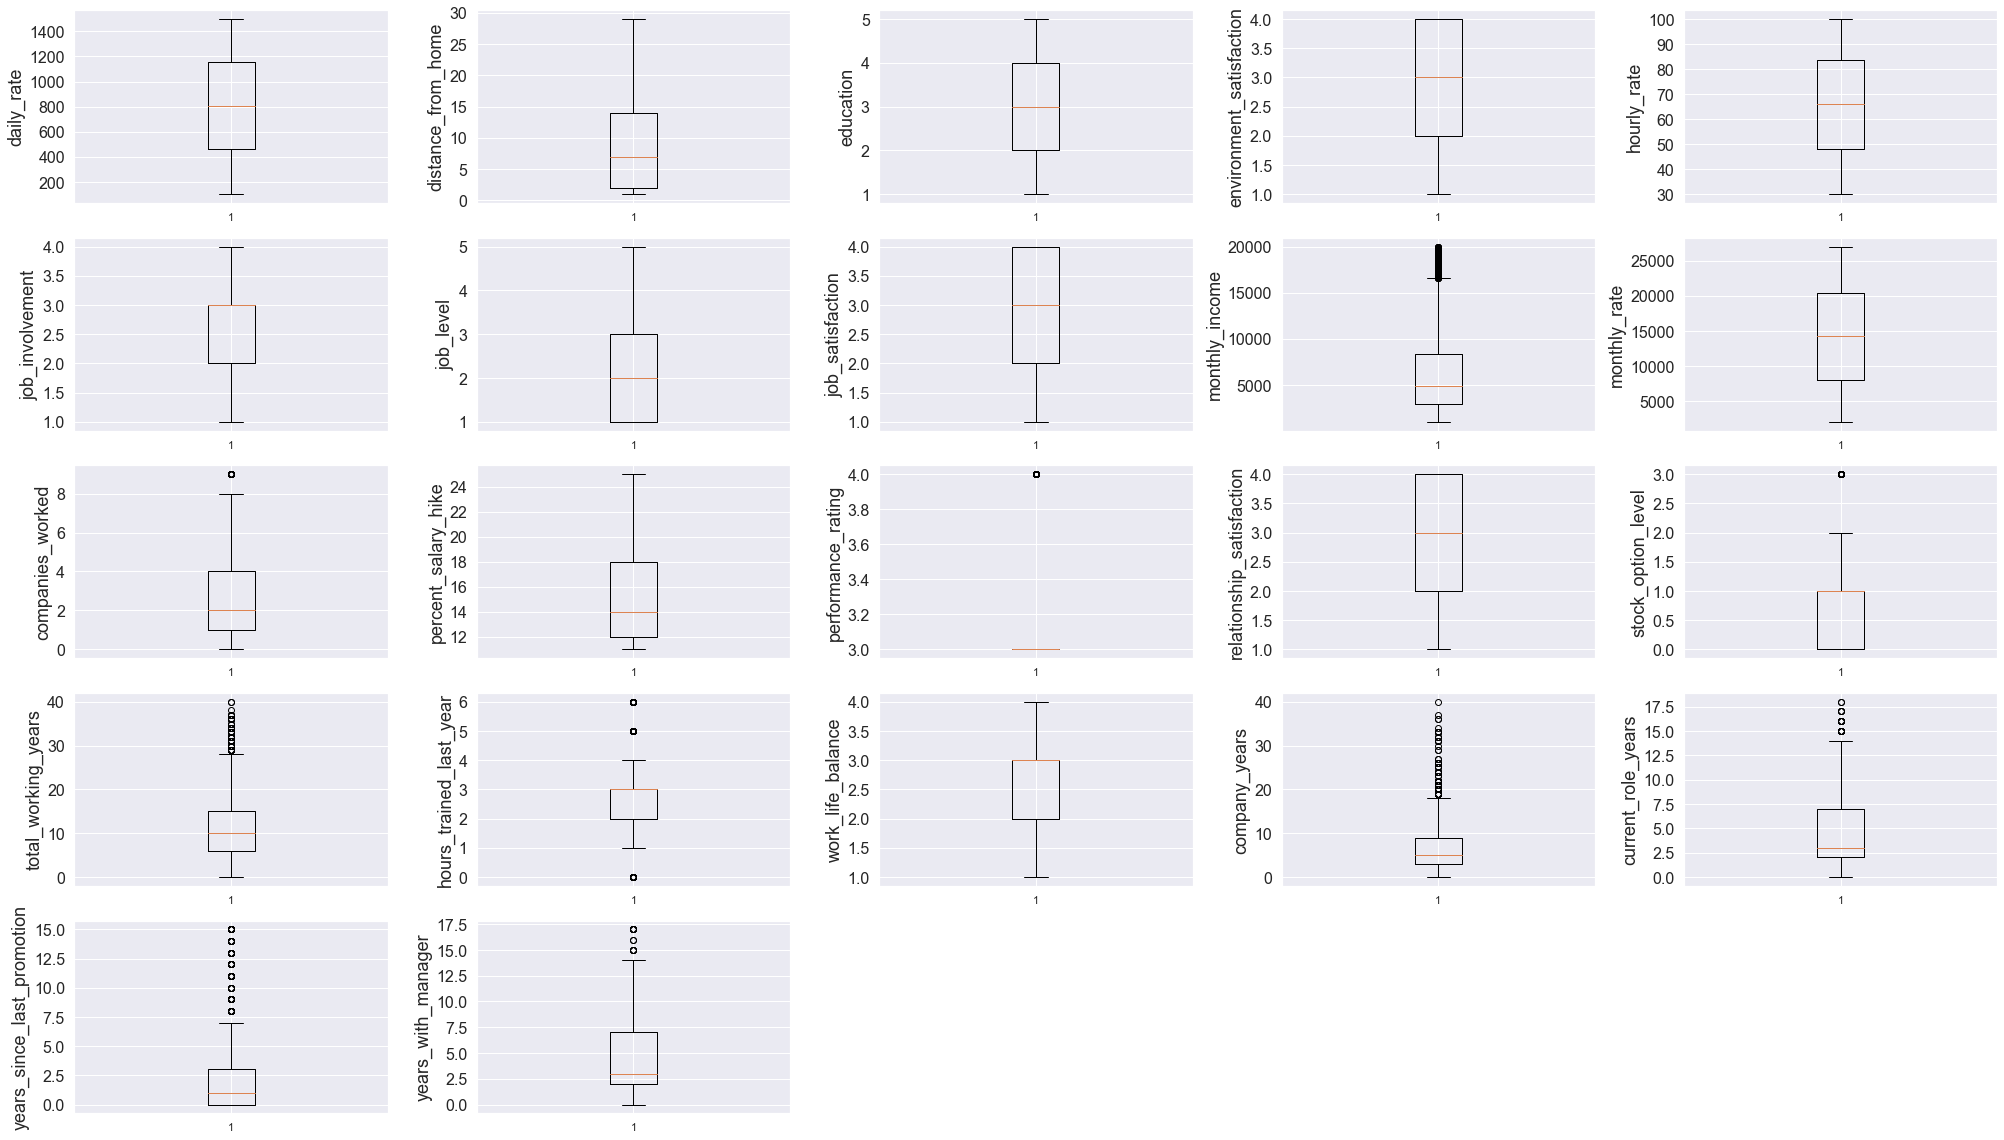

In [35]:
numeric.remove('job_role')
explore.boxplot_grid(df, numeric)

### Initial Questions
I. What is the total percentage of attrition? What is the attrition like across departments?

In [36]:
print(f'Total attrition is {round((len(df[df.attrition == 1]) / len(df)) * 100)}%')

Total attrition is 16%


In [37]:
print(f'Train attrition is {round((len(train[train.attrition == 1]) / len(train)) * 100)}%')

Train attrition is 16%


Sklearn stratified my split correctly.

In [38]:
research_and_dev = train[train.department == 'Research & Development']
sales = train[train.department == 'Sales']
human_resources = train[train.department == 'Human Resources']

In [39]:
d

NameError: name 'd' is not defined

In [ ]:
numeric.append('attrition')

In [ ]:
#run pairplot
sns.pairplot(train[numeric], hue = 'attrition')

Not many correlations here.
Features to consider further linear correlations:
* job_involvement, job_level, job_satisfaction, monthly_income, monthly_rate, total_working_years, hours_trained_last_year, work_life_balance, hours_trained_last_year, company_years, current_role_years, years_since_last_promotion, years with manager

In [ ]:
pair_these = ['job_involvement',
              'job_level',
              'job_satisfaction',
              'monthly_income',
              'monthly_rate',
              'total_working_years',
              'hours_trained_last_year',
              'work_life_balance',
              'hours_trained_last_year',
              'company_years',
              'current_role_years',
              'years_since_last_promotion',
              'years_with_manager']